In [1]:
# 사용 라이브러리

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

import datetime
import matplotlib.pyplot as plt
import numpy 
import pandas as pd
import seaborn as sns
import warnings
import statsmodels.tsa.api as tsa
from pmdarima.arima import auto_arima

import itertools

# Ignore DeprecationWarning
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Your code here

# Reset warnings to default behavior (optional)
warnings.resetwarnings()

In [2]:
df = pd.read_csv('../Desktop/data/train_ML_IOT.csv')

df_1 = df[df['Junction'] == 1]
df1 = df_1.copy()
df1.drop('ID', axis=1, inplace=True)

df_3 = df[df['Junction']  == 3]
df3 = df_3.copy()
df3.drop('ID', axis=1, inplace=True)

In [3]:
df1['Datetime'] = pd.to_datetime(df1['DateTime'])
df3['Datetime'] = pd.to_datetime(df3['DateTime'])

df2 = df1.copy()
df4 = df3.copy()

df2['Year'] = df1['Datetime'].dt.year
df2['Month'] = df1['Datetime'].dt.month
df2['Week'] = df1['Datetime'].dt.week
df2['Hour'] = df1['Datetime'].dt.hour
df2['Day_of_Week'] = df1['Datetime'].dt.day_name()

df4['Year'] = df3['Datetime'].dt.year
df4['Month'] = df3['Datetime'].dt.month
df4['Week'] = df3['Datetime'].dt.week
df4['Hour'] = df3['Datetime'].dt.hour
df4['Day_of_Week'] = df3['Datetime'].dt.day_name()

C:\Users\KJY\AppData\Local\Temp\ipykernel_20116\809124018.py:9: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['Week'] = df1['Datetime'].dt.week
C:\Users\KJY\AppData\Local\Temp\ipykernel_20116\809124018.py:15: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df4['Week'] = df3['Datetime'].dt.week


<AxesSubplot:xlabel='Datetime', ylabel='Vehicles'>

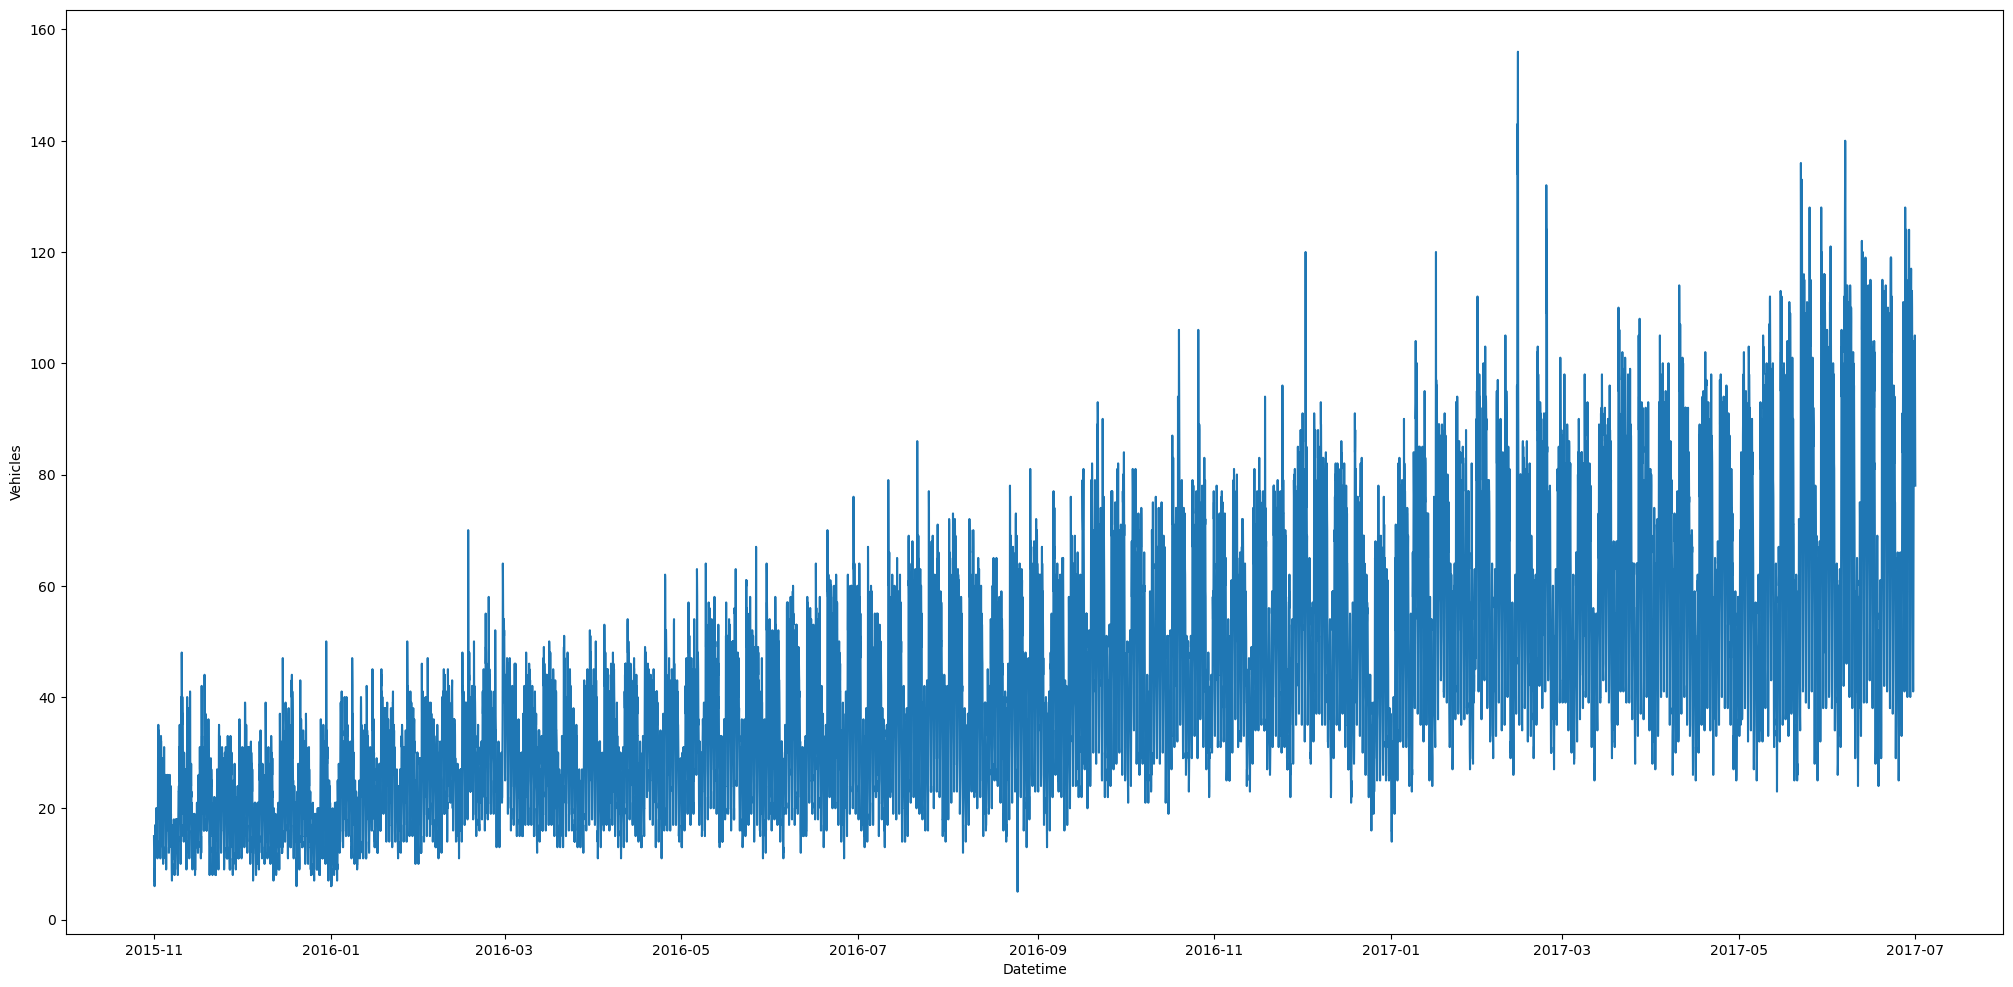

In [4]:
plt.figure(figsize = (25, 12))
sns.lineplot(data=df2, x='Datetime', y='Vehicles')

In [5]:
df1.set_index('Datetime', inplace=True)
y = df1['Vehicles'].resample('1D').mean()

<function matplotlib.pyplot.show(close=None, block=None)>

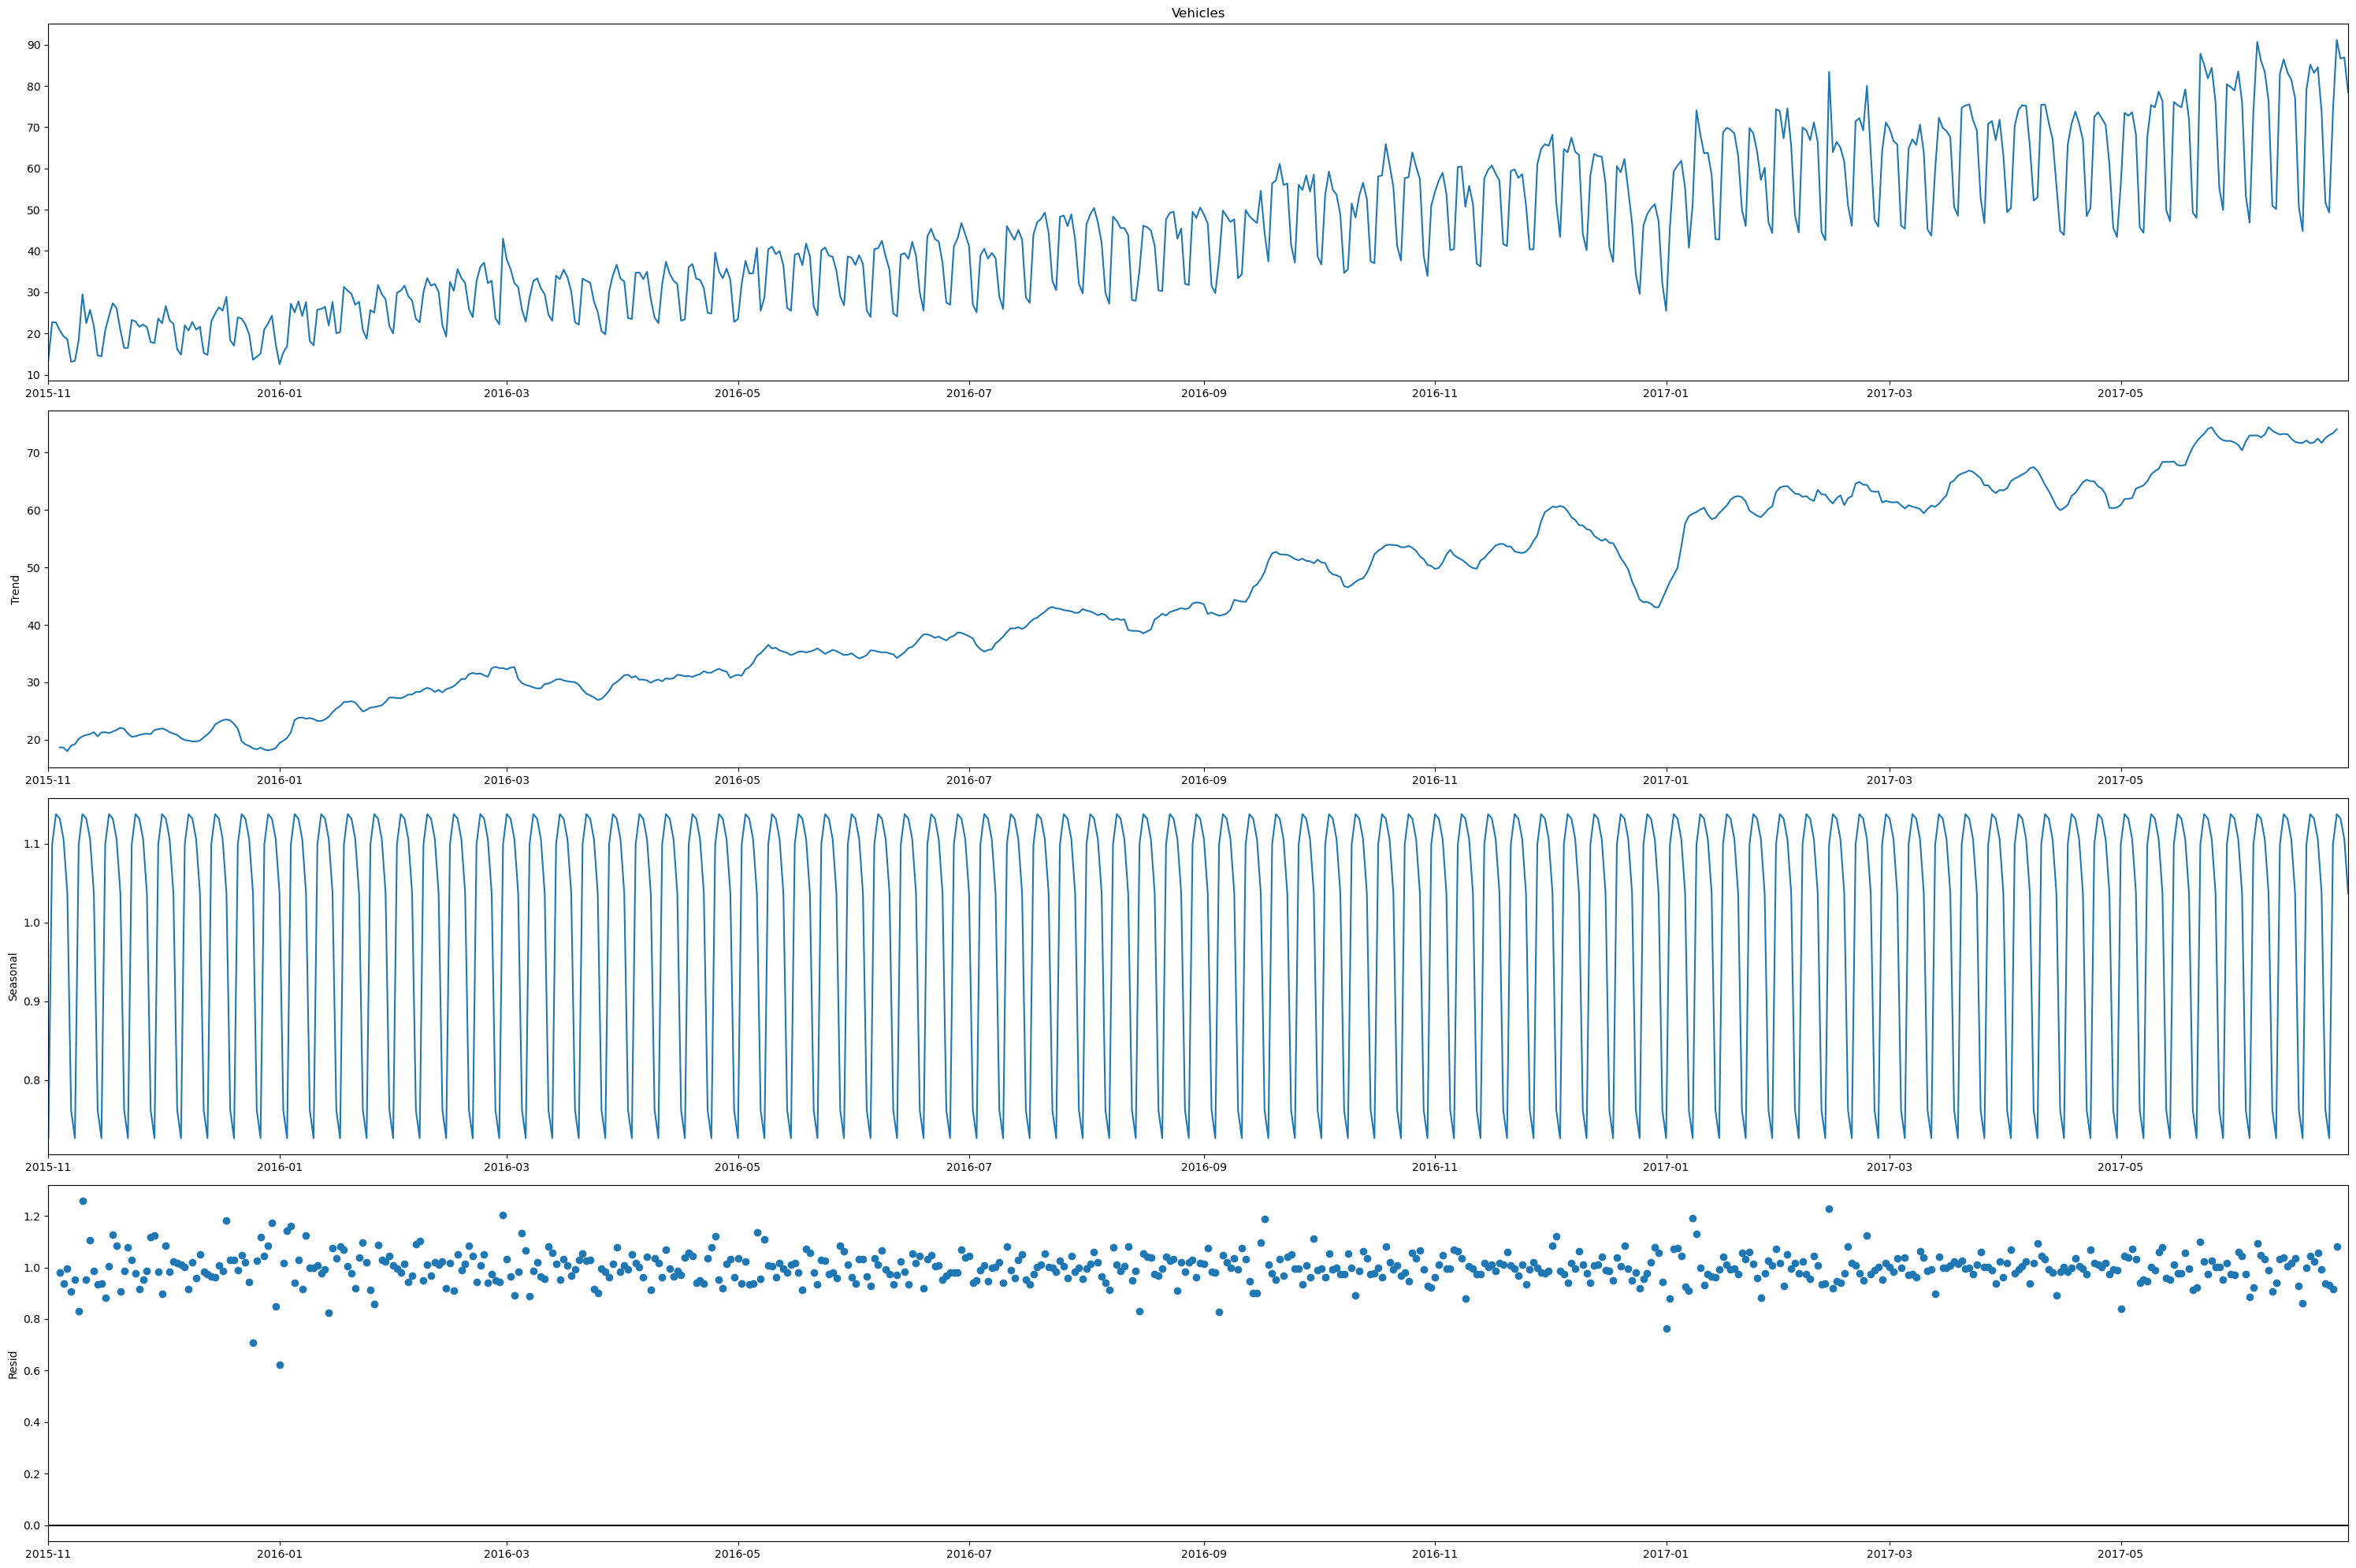

In [6]:
from pylab import rcParams

rcParams['figure.figsize'] = 30, 20

# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y, model = 'multiplicative')

# 모델 시각화
fig = model_series.plot()
plt.show

In [7]:
import numpy as np
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [8]:
y = df1['Vehicles'].resample('1D').mean()
log_y = np.log(y)

C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


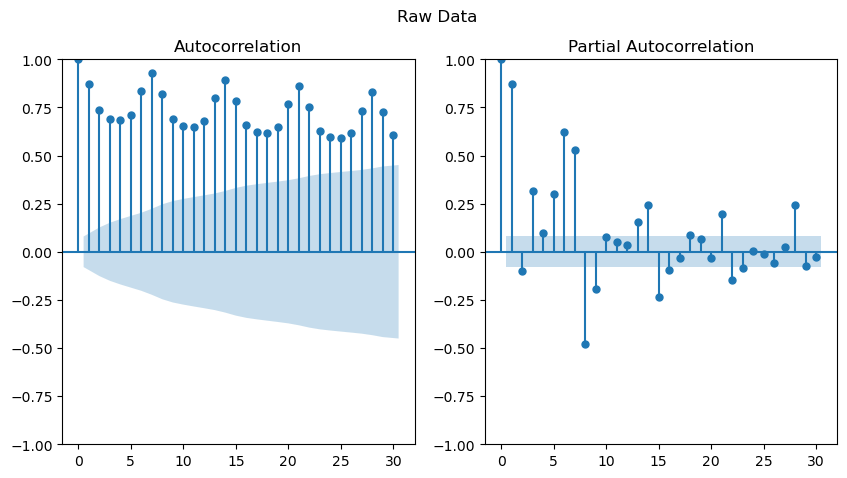

In [9]:
# ACF, PACF 시각화

fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Raw Data')
a = plot_acf(log_y.values.squeeze(), lags=30, ax = ax[0])
b = plot_pacf(log_y.values.squeeze(), lags=30, ax = ax[1])

In [10]:
train_data = df2[~((df2['Year'] == 2017) & (df2['Month'] >= 5))]
test_data = df2[(df2['Year'] == 2017) & (df2['Month'] >= 5)]

train_data.set_index('Datetime', inplace = True)
test_data.set_index('Datetime', inplace = True)

y_train = train_data['Vehicles'].resample('1D').mean()
y_test = test_data['Vehicles'].resample('1D').mean()

# log 변환
log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

diff_data = log_y_train.diff()
diff_data = diff_data .dropna()

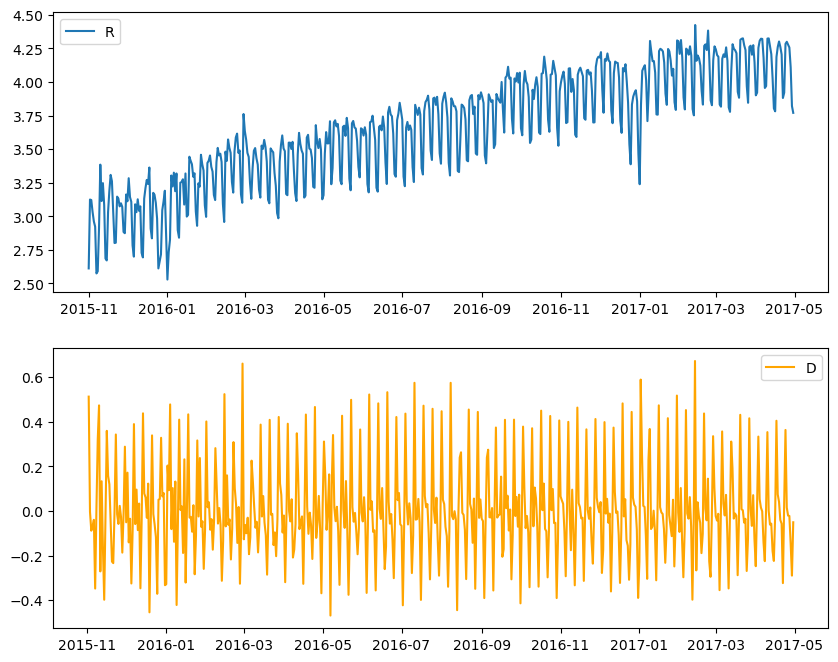

In [11]:
plt.figure(figsize = (10, 8))
plt.subplot(211)
plt.plot(log_y_train)
plt.legend('Raw data(Nonstationary)')
plt.subplot(212)
plt.plot(diff_data, 'orange')
plt.legend('Differenced Data(stationary)')
plt.show()

C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


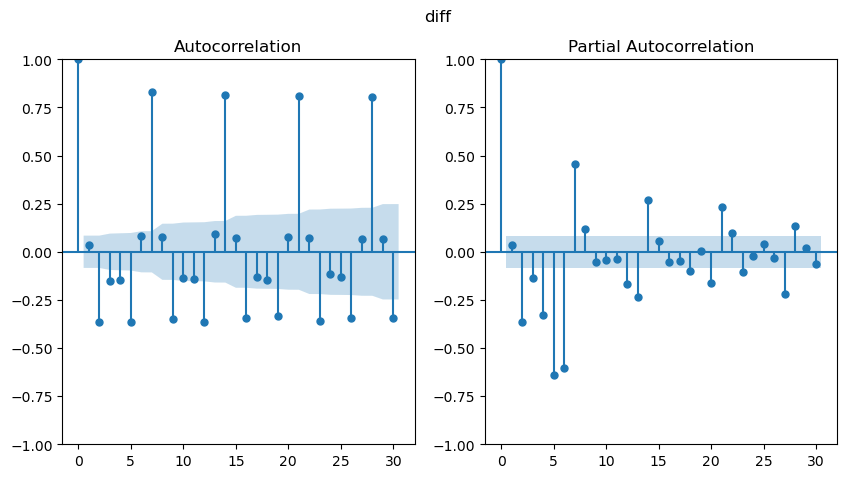

In [12]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('diff')
a = plot_acf(diff_data, lags=30, ax = ax[0])
b = plot_pacf(diff_data, lags=30, ax = ax[1])

In [13]:
print('Example of parameter')
p = range(1, 4)
d = range(1, 2)
q = range(1, 4)
pdq = list(itertools.product(p, d, q))

aic = []
for i in pdq:
    model = ARIMA(log_y_train, order=(i))
    model_fit = model.fit()
    print(f'ARIMA: {i} >> AIC : {round(model_fit.aic, 2)}')
    aic.append(round(model_fit.aic, 2))

Example of parameter
ARIMA: (1, 1, 1) >> AIC : -274.89


C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA: (1, 1, 2) >> AIC : -353.54
ARIMA: (1, 1, 3) >> AIC : -352.66
ARIMA: (2, 1, 1) >> AIC : -389.57


C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA: (2, 1, 2) >> AIC : -458.38


C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA: (2, 1, 3) >> AIC : -652.71
ARIMA: (3, 1, 1) >> AIC : -395.23
ARIMA: (3, 1, 2) >> AIC : -394.85
ARIMA: (3, 1, 3) >> AIC : -647.1


C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
auto_arima_model = auto_arima(log_y_train, start_p = 1, start_q = 1,
                             max_p = 3, max_q = 3, seasonal = False,
                             d=1, D=1,
                             max_P = 3, max_Q = 3,
                             trace = True,
                             error_action = 'ignore',
                             suppress_warnings = True,
                             stepwise = False)

In [14]:
model = ARIMA(log_y_train, order = (2, 1, 3))
model_fit = model.fit()
model_fit.summary()

C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Vehicles   No. Observations:                  547
Model:                 ARIMA(2, 1, 3)   Log Likelihood                 332.353
Date:                Sun, 26 Nov 2023   AIC                           -652.705
Time:                        16:11:50   BIC                           -626.890
Sample:                    11-01-2015   HQIC                          -642.614
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2472      0.001   1778.852      0.000       1.246       1.249
ar.L2         -0.9999      0.000  -4163.218      0.000      -1.000      -0.999
ma.L1         -2.0853      0.067    -31.316      0.000      -2.216      -1.955
ma.L2          2.0482      0.153     13.397      0.000       1.749       2.348
ma.L3         -0.8465      0.086     -9.888      0.000      -1.014      -0.679
sigma2         0.0160      0.002      9.567      0.000       0.013       0.019
===================================================================================
Ljung-Box (L1) (Q):                   0.27   Jarque-Bera (JB):                13.25
Prob(Q):                              0.60   Prob(JB):                         0.00
Heteroskedasticity (H):               0.91   Skew:                             0.37
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.22
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [15]:
prediction  = model_fit.forecast(steps=len(log_y_test), alpha=0.05)
prediction = pd.DataFrame(prediction)
prediction

,predicted_mean
2017-05-01,4.048394
2017-05-02,4.240406
2017-05-03,4.327389
2017-05-04,4.243885
2017-05-05,4.052764
...,...
2017-06-26,4.046322
2017-06-27,4.238149
2017-06-28,4.326646
2017-06-29,4.245215


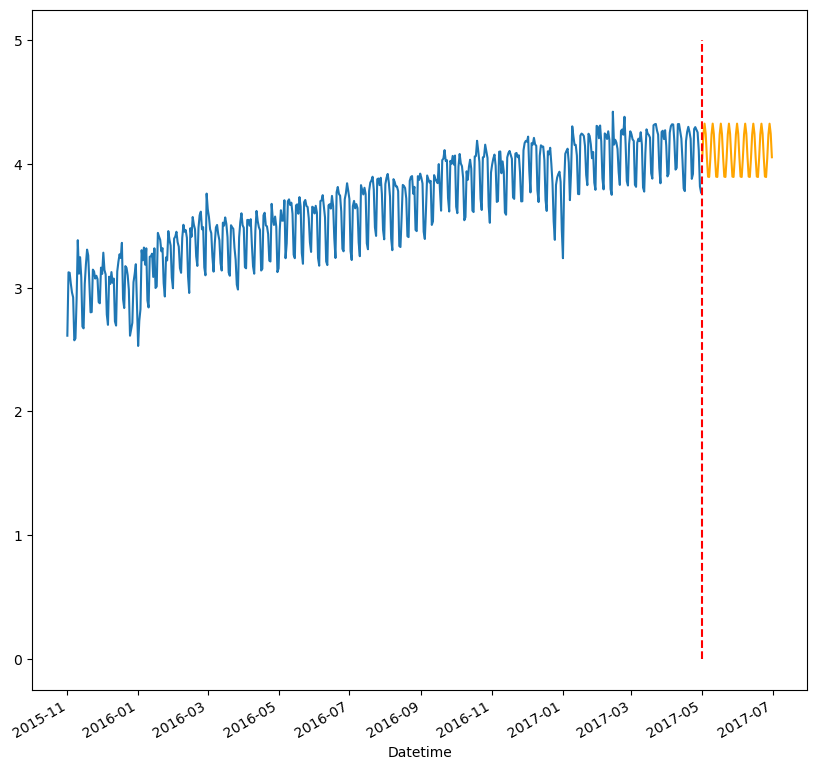

In [16]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(prediction.index, prediction['predicted_mean'], color = 'orange')
log_y_train.plot(ax = ax)
ax.vlines('2017-05-01', 0, 5, linestyle = '--', color = 'r', label = 'Start of Forecast')

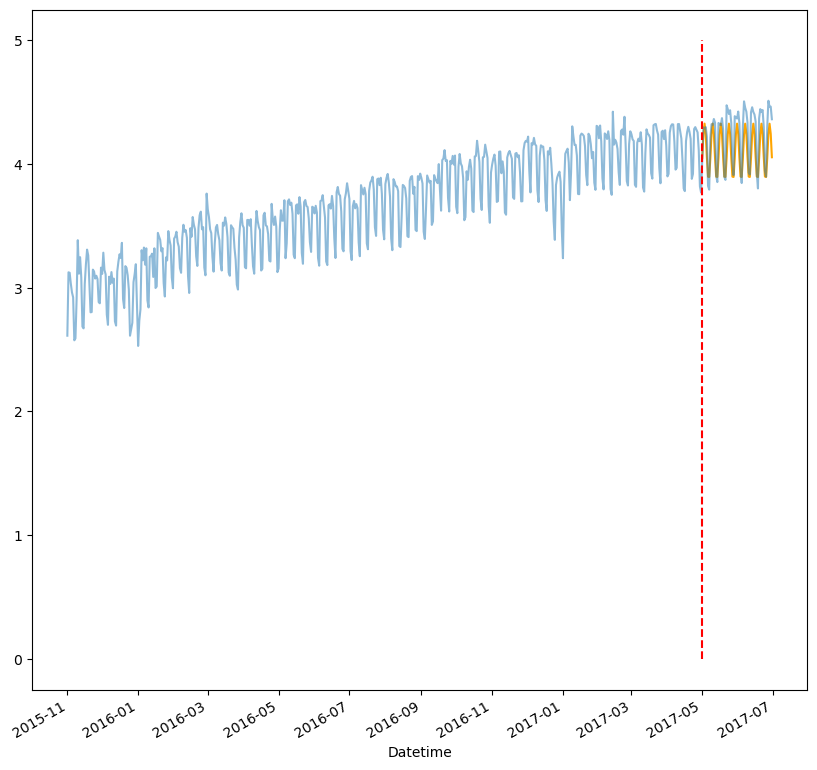

In [17]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(prediction.index, prediction['predicted_mean'], color = 'orange')
log_y.plot(ax = ax, alpha=0.5)
ax.vlines('2017-05-01', 0, 5, linestyle = '--', color = 'r', label = 'Start of Forecast')

## 계절성 고려

auto_arima_model = auto_arima(log_y_train, start_p = 1, start_q = 1,
                             max_p = 3, max_q = 3, m =7, seasonal=True,
                             d=1, D=1,
                             max_P = 3, max_Q = 3,
                             trace = True,
                             error_action = 'ignore',
                             suppress_warnings = True,
                             stepwise = False)

In [17]:
model_opt = SARIMAX(log_y_train , order = (2, 1, 2), seasonal_order = (1, 1, 2, 7))
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          Vehicles   No. Observations:                  547
Model:             SARIMAX(2, 1, 2)x(1, 1, 2, 7)   Log Likelihood                 596.981
Date:                           Sun, 26 Nov 2023   AIC                          -1177.961
Time:                                   16:12:13   BIC                          -1143.644
Sample:                               11-01-2015   HQIC                         -1164.539
                                    - 04-30-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0249      0.236      4.349      0.000       0.563       1.487
ar.L2         -0.1675      0.139     -1.206      0.228      -0.440       0.105
ma.L1         -1.4786      0.232     -6.363      0.000      -1.934      -1.023
ma.L2          0.4971      0.215      2.312      0.021       0.076       0.919
ar.S.L7       -0.9239      0.052    -17.720      0.000      -1.026      -0.822
ma.S.L7        0.0054      0.051      0.107      0.915      -0.094       0.105
ma.S.L14      -0.9223      0.043    -21.549      0.000      -1.006      -0.838
sigma2         0.0061      0.000     22.462      0.000       0.006       0.007
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               198.81
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.49   Skew:                             0.12
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [18]:
prediction = model_opt_fit.get_forecast(len(log_y_test))
prediction_value = prediction.predicted_mean
prediction_value

prediction_value = pd.DataFrame(prediction_value)

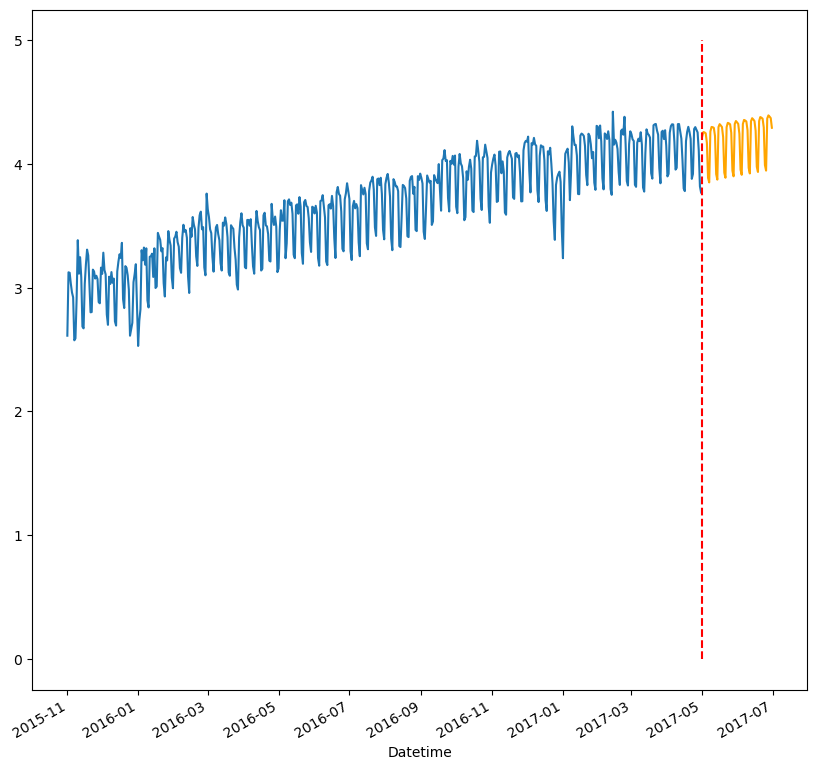

In [19]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(prediction_value.index, prediction_value['predicted_mean'], color = 'orange')
log_y_train.plot(ax = ax)
ax.vlines('2017-05-01', 0, 5, linestyle = '--', color = 'r', label = 'Start of Forecast')

<AxesSubplot:xlabel='Datetime'>

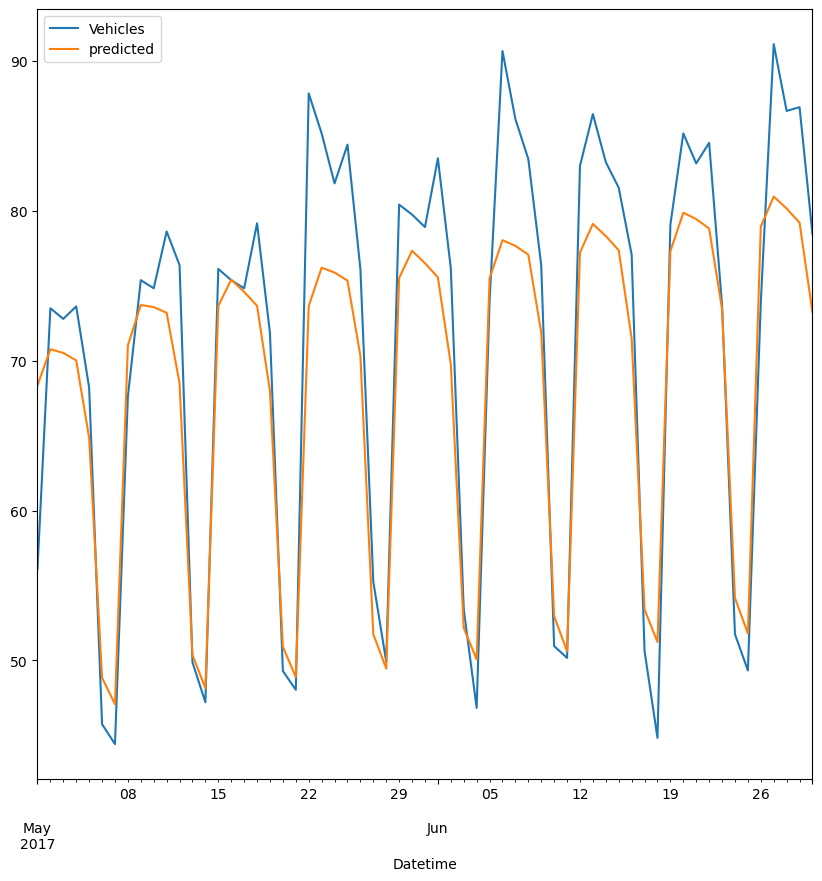

In [20]:
predicted_value = np.exp(prediction_value['predicted_mean'])

merged_df = pd.DataFrame(y_test)
merged_df['predicted'] = predicted_value

merged_df.plot(figsize = (10, 10))

## Junction 3

<AxesSubplot:xlabel='Datetime', ylabel='Vehicles'>

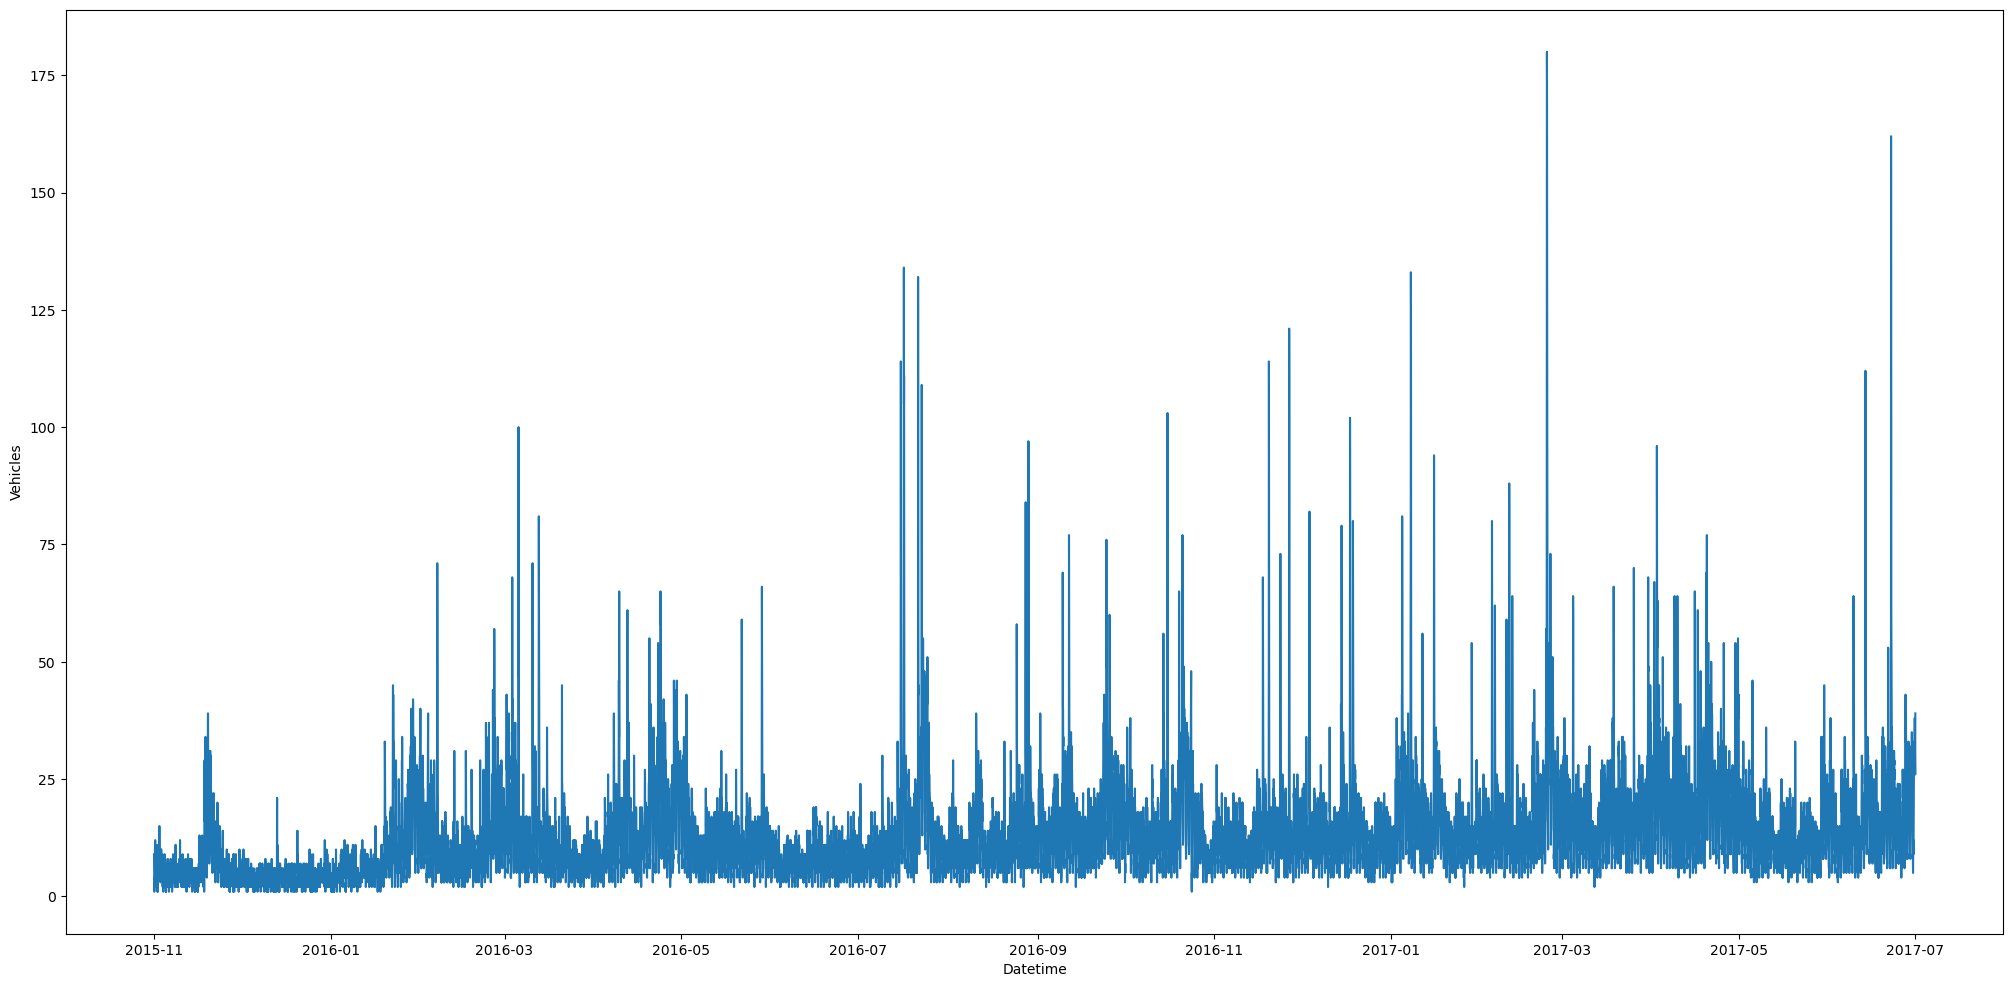

In [21]:
plt.figure(figsize = (25, 12))
sns.lineplot(data=df4, x='Datetime', y='Vehicles')

<function matplotlib.pyplot.show(close=None, block=None)>

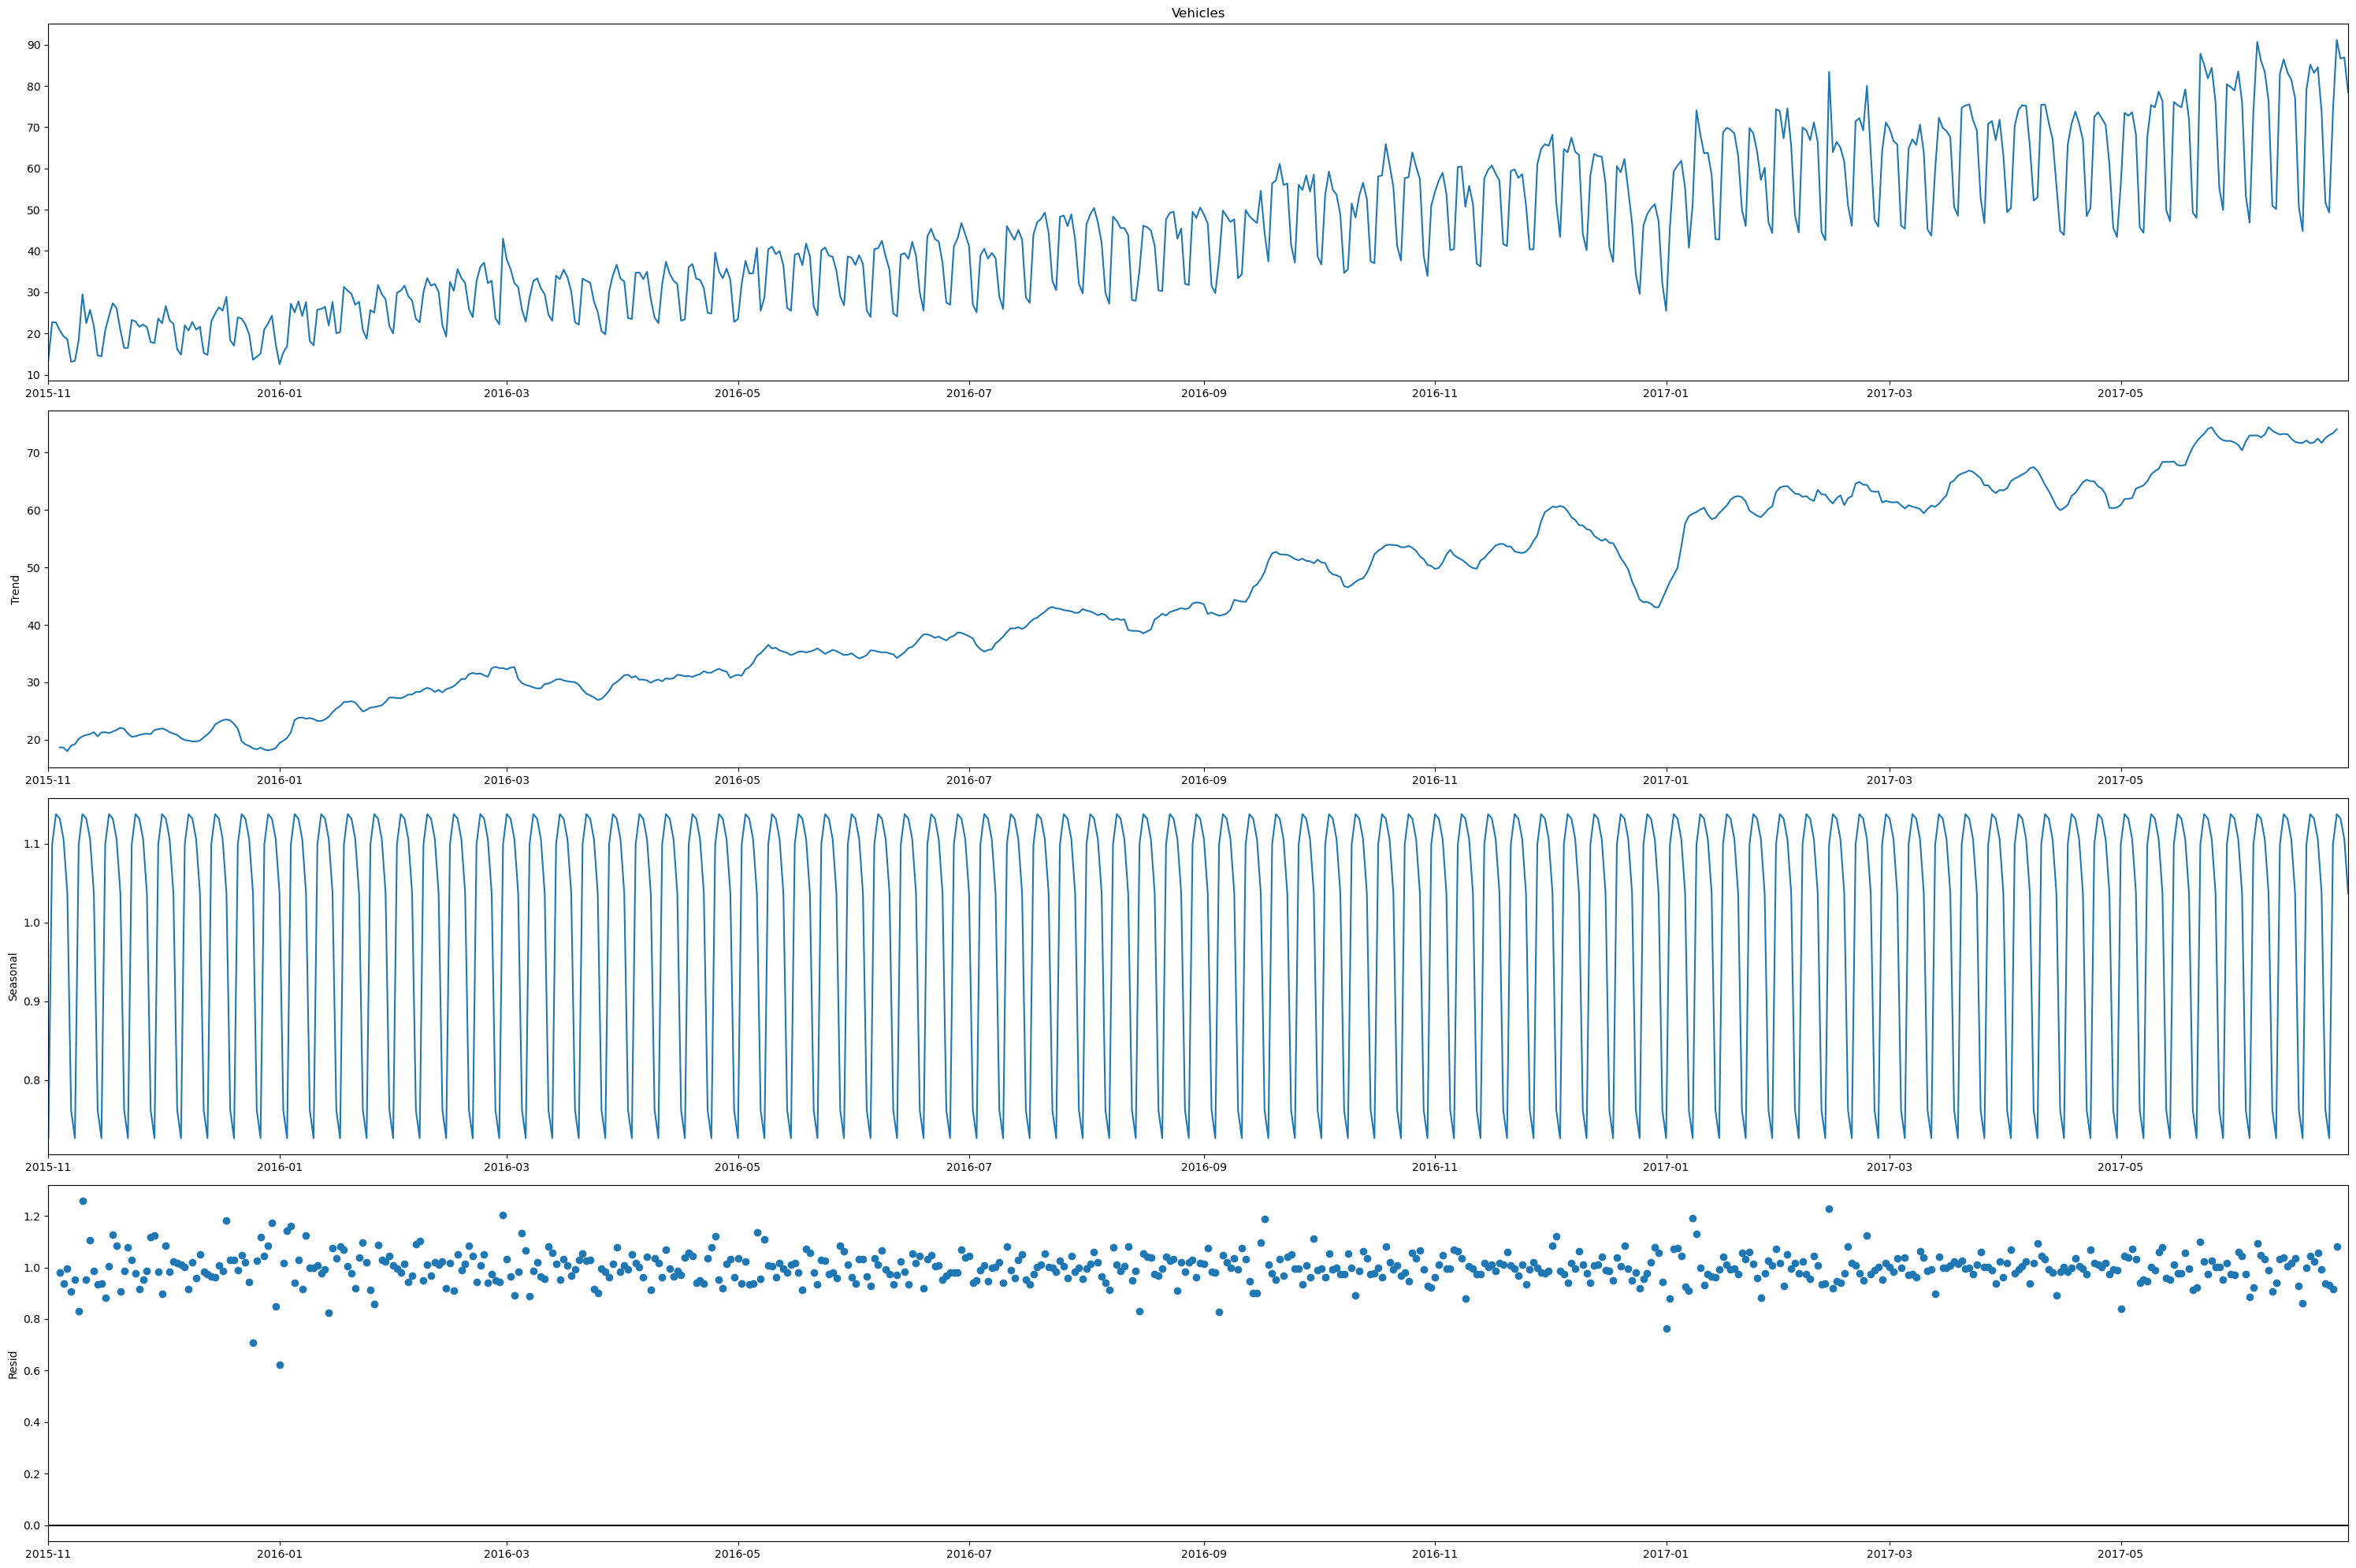

In [22]:
# 시계열 모델 생성
model_series = tsa.seasonal_decompose(y, model = 'multiplicative')

# 모델 시각화
fig = model_series.plot()
plt.show

In [23]:
## 로그변환

log_y = np.log(y)
log_y

Datetime
2015-11-01    2.611906
2015-11-02    3.124565
2015-11-03    3.120895
2015-11-04    3.032546
2015-11-05    2.961831
                ...   
2017-06-26    4.302938
2017-06-27    4.512232
2017-06-28    4.462069
2017-06-29    4.464950
2017-06-30    4.362568
Freq: D, Name: Vehicles, Length: 608, dtype: float64

In [24]:
df4.set_index('Datetime', inplace = True)

In [25]:
train_data = df4[~((df4['Year'] == 2017) & (df4['Month'] >= 5))]
test_data = df4[(df4['Year'] == 2017) & (df4['Month'] >= 5)]

In [26]:
y_train = train_data['Vehicles'].resample('1D').mean()
y_test = test_data['Vehicles'].resample('1D').mean()

# log 변환

log_y_train = np.log(y_train)
log_y_test = np.log(y_test)

In [27]:
log_y_test

Datetime
2017-05-01    2.920020
2017-05-02    2.866951
2017-05-03    2.772589
2017-05-04    2.833213
2017-05-05    2.813411
                ...   
2017-06-26    2.847812
2017-06-27    3.162305
2017-06-28    3.042536
2017-06-29    3.030536
2017-06-30    3.137304
Freq: D, Name: Vehicles, Length: 61, dtype: float64

In [28]:
diff_data = log_y_train.diff()
diff_data = diff_data .dropna()

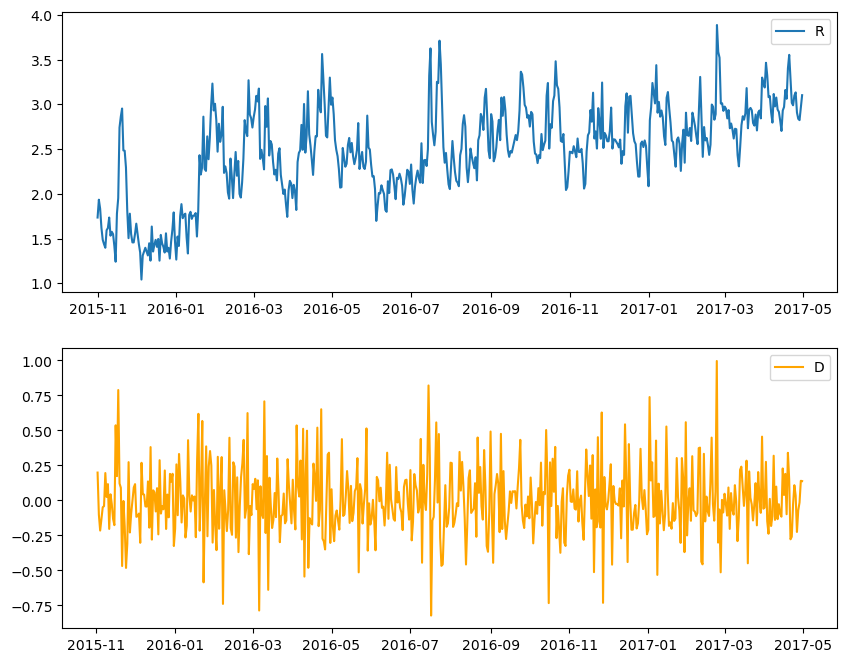

In [29]:
plt.figure(figsize = (10, 8))
plt.subplot(211)
plt.plot(log_y_train)
plt.legend('Raw data(Nonstationary)')
plt.subplot(212)
plt.plot(diff_data, 'orange')
plt.legend('Differenced Data(stationary)')
plt.show()

C:\Users\KJY\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


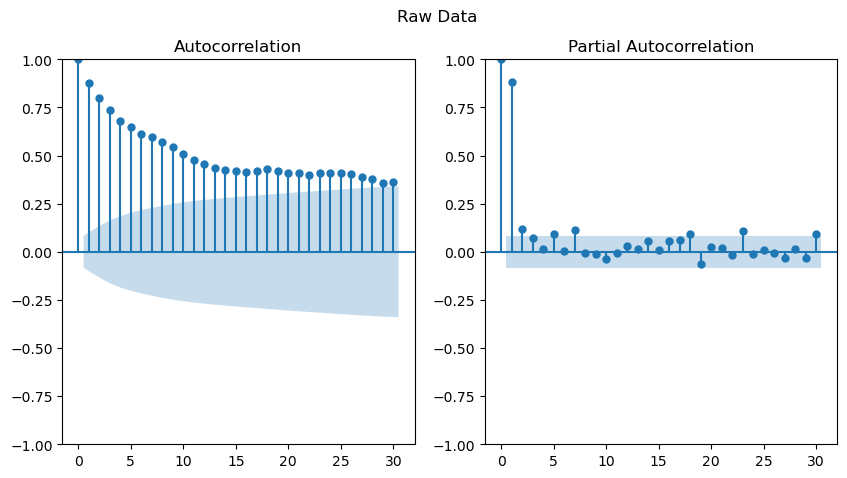

In [30]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('Raw Data')
a = plot_acf(log_y_train.values.squeeze(), lags=30, ax = ax[0])
b = plot_pacf(log_y_train.values.squeeze(), lags=30, ax = ax[1])

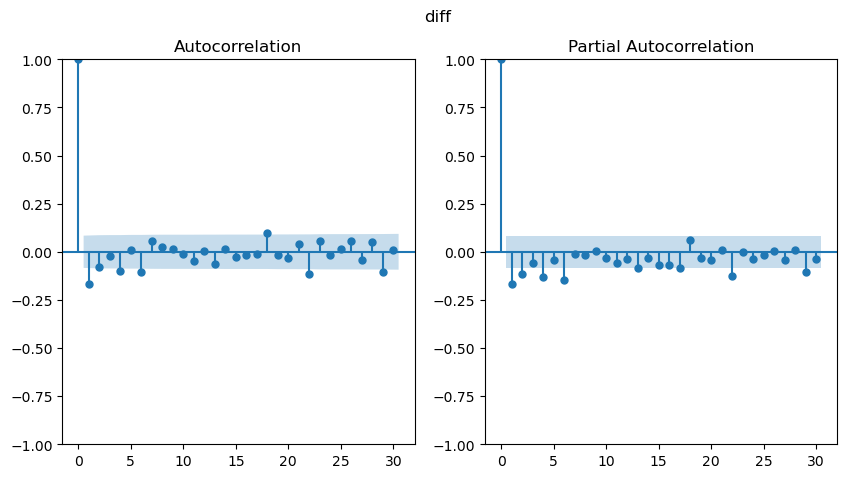

In [31]:
fig, ax = plt.subplots(1, 2, figsize = (10, 5))
fig.suptitle('diff')
a = plot_acf(diff_data, lags=30, ax = ax[0])
b = plot_pacf(diff_data, lags=30, ax = ax[1])

In [ ]:
auto_arima_model = auto_arima(log_y_train, start_p = 1, start_q = 1,
                             max_p = 3, max_q = 3, seasonal = False,
                             d=1, D=1,
                             max_P = 3, max_Q = 3,
                             trace = True,
                             error_action = 'ignore',
                             suppress_warnings = True,
                             stepwise = False)

In [32]:
model = ARIMA(log_y_train, order = (1, 1, 1))
model_fit = model.fit()
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:               Vehicles   No. Observations:                  547
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   9.138
Date:                Sun, 26 Nov 2023   AIC                            -12.276
Time:                        16:13:02   BIC                              0.632
Sample:                    11-01-2015   HQIC                            -7.231
                         - 04-30-2017                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7444      0.037     20.318      0.000       0.673       0.816
ma.L1         -0.9537      0.018    -53.815      0.000      -0.988      -0.919
sigma2         0.0565      0.003     21.194      0.000       0.051       0.062
===================================================================================
Ljung-Box (L1) (Q):                   0.93   Jarque-Bera (JB):                74.69
Prob(Q):                              0.33   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             0.68
Prob(H) (two-sided):                  0.03   Kurtosis:                         4.21
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [33]:
prediction = model_fit.get_forecast(steps= len(log_y_test))
prediction_value = prediction.predicted_mean
prediction_value

prediction_value = pd.DataFrame(prediction_value)

In [37]:
prediction_value.index

DatetimeIndex(['2017-05-01', '2017-05-02', '2017-05-03', '2017-05-04',
               '2017-05-05', '2017-05-06', '2017-05-07', '2017-05-08',
               '2017-05-09', '2017-05-10', '2017-05-11', '2017-05-12',
               '2017-05-13', '2017-05-14', '2017-05-15', '2017-05-16',
               '2017-05-17', '2017-05-18', '2017-05-19', '2017-05-20',
               '2017-05-21', '2017-05-22', '2017-05-23', '2017-05-24',
               '2017-05-25', '2017-05-26', '2017-05-27', '2017-05-28',
               '2017-05-29', '2017-05-30', '2017-05-31', '2017-06-01',
               '2017-06-02', '2017-06-03', '2017-06-04', '2017-06-05',
               '2017-06-06', '2017-06-07', '2017-06-08', '2017-06-09',
               '2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
      

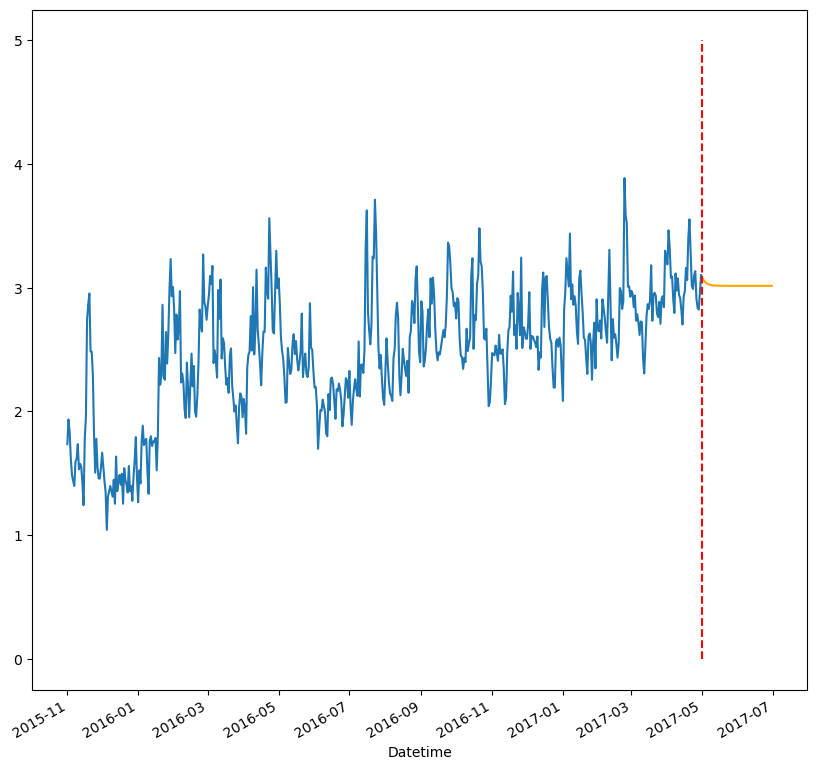

In [38]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(prediction_value.index, prediction_value['predicted_mean'], color = 'orange')
log_y_train.plot(ax = ax)
ax.vlines('2017-05-01', 0, 5, linestyle = '--', color = 'r', label = 'Start of Forecast')

In [ ]:
p = range(1, 3)
d = range(1, 2)
q = range(1, 3)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

aic = []
params = []
for i in pdq:
    for j in seasonal_pdq:
        try:
            model = SARIMAX(log_y_train , order=(i), seasonal_order = (j))
            model_fit = model.fit()
            print(f'SARIMA: {i}{j} >> AIC : {round(model_fit.aic, 2)}')
            aic.append(round(model_fit.aic, 2))
            params.append((i, j))
        except:
            continue

In [ ]:
optimal = [(params[i], j) for i, j in enumerate(aic) if j == min(aic)]
optimal

In [39]:
model_opt = SARIMAX(log_y_train , order = (1, 1, 1), seasonal_order = (1, 1, 1, 7))
model_opt_fit = model_opt.fit()

model_opt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                          Vehicles   No. Observations:                  547
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood                  10.243
Date:                           Sun, 26 Nov 2023   AIC                            -10.485
Time:                                   16:14:11   BIC                             10.963
Sample:                               11-01-2015   HQIC                            -2.096
                                    - 04-30-2017                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7751      0.033     23.229      0.000       0.710       0.841
ma.L1         -0.9685      0.019    -50.294      0.000      -1.006      -0.931
ar.S.L7        0.0147      0.045      0.329      0.742      -0.073       0.102
ma.S.L7       -0.9964      0.141     -7.068      0.000      -1.273      -0.720
sigma2         0.0531      0.008      6.958      0.000       0.038       0.068
===================================================================================
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):                95.78
Prob(Q):                              0.63   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.81
Prob(H) (two-sided):                  0.01   Kurtosis:                         4.29
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [40]:
prediction = model_opt_fit.get_forecast(steps = len(log_y_test))
prediction_value = prediction.predicted_mean
prediction_value
prediction_value = pd.DataFrame(prediction_value)

In [41]:
prediction_value

,predicted_mean
2017-05-01,3.200642
2017-05-02,3.145399
2017-05-03,3.125766
2017-05-04,3.147347
2017-05-05,3.142140
...,...
2017-06-26,3.234828
2017-06-27,3.202500
2017-06-28,3.204735
2017-06-29,3.242269


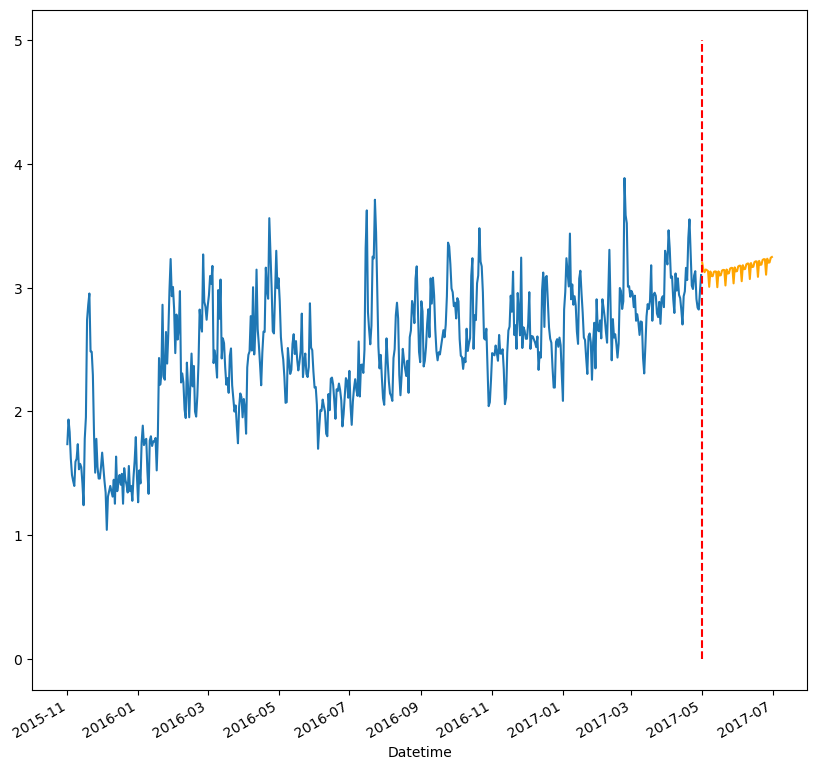

In [44]:
fig, ax = plt.subplots(figsize = (10, 10))
ax.plot(prediction_value.index, prediction_value['predicted_mean'], color = 'orange')
log_y_train.plot(ax = ax)
ax.vlines('2017-05-01', 0, 5, linestyle = '--', color = 'r', label = 'Start of Forecast')

<AxesSubplot:xlabel='Datetime'>

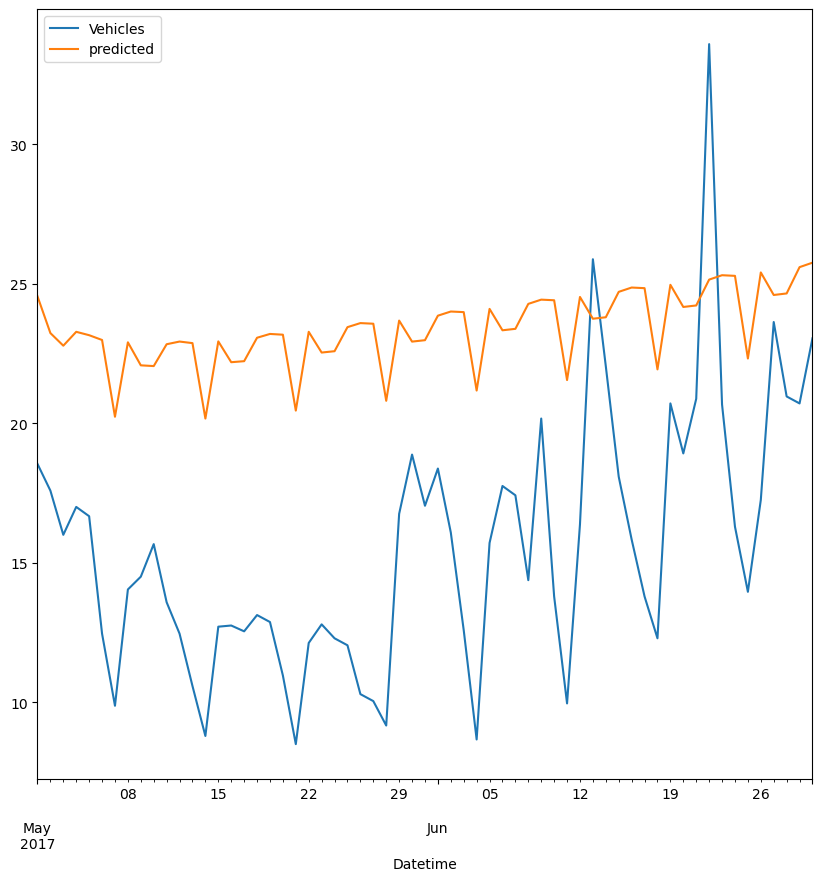

In [45]:
predicted_value = np.exp(prediction_value['predicted_mean'])

merged_df = pd.DataFrame(y_test)
merged_df['predicted'] = predicted_value

merged_df.plot(figsize = (10, 10))